In [43]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

file_path = "../dataset_distilled_from_7b/kk/instruct/5ppl/train.parquet"
# file_path = "../dataset_distilled_from_7b/kk/instruct/5ppl/val.parquet"

In [44]:
df = pd.read_parquet(
    file_path,
    engine="pyarrow"
)

In [45]:
display(df.head())

,quiz,names,knight_knave,solution,solution_text,solution_text_format,cot_head,cot_repeat_steps,cot_foot,statements,...,ability,reward_model,extra_info,raw_responses,input_ids,attention_mask,position_ids,old_log_probs,reward_score,decoded_responses
0,A very special island is inhabited only by kni...,"[Ella, Zoey, Scarlett, Henry, Amelia]","{'Knave': 'Knave', 'Knight': 'Knight', 'a_knav...","[True, False, True, True, False]","Ella is a knight, Zoey is a knave, Scarlett is...",(1) Ella is a knight\n(2) Zoey is a knave\n(3)...,"Let's think step by step, by considering wheth...",[Assume Ella is a knight. No contradiction is ...,This leads to a feasible solution.,"(('or', ('telling-truth', 1), ('lying', 1)), (...",...,logic,{'ground_truth': {'solution_text_format': '(1)...,"{'apply_chat_template': True, 'index': 0, 'spl...","[[27, 26865, 29, 2014, 11625, 419, 11, 1077, 5...","[[151643, 151643, 151643, 151643, 151643, 1516...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[{'extra_info': {'format_score': 1, 'outcome_s...","[<think> To solve this, let's analyze each sta..."
1,A very special island is inhabited only by kni...,"[Grace, Abigail, Michael, Chloe, Henry]","{'Knave': 'Knave', 'Knight': 'Knight', 'a_knav...","[False, True, False, False, True]","Grace is a knave, Abigail is a knight, Michael...",(1) Grace is a knave\n(2) Abigail is a knight\...,"Let's think step by step, by considering wheth...",[Assume Grace is a knight. No contradiction is...,This leads to a feasible solution.,"(('and', ('telling-truth', 2), ('lying', 3)), ...",...,logic,{'ground_truth': {'solution_text_format': '(1)...,"{'apply_chat_template': True, 'index': 1, 'spl...","[[27, 26865, 29, 2014, 11625, 419, 11, 1077, 5...","[[151643, 151643, 151643, 151643, 151643, 1516...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[{'extra_info': {'format_score': 1, 'outcome_s...","[<think> To solve this, let's analyze each sta..."
2,A very special island is inhabited only by kni...,"[Aiden, William, Evelyn, Jackson, Ava]","{'Knave': 'Knave', 'Knight': 'Knight', 'a_knav...","[False, False, False, True, True]","Aiden is a knave, William is a knave, Evelyn i...",(1) Aiden is a knave\n(2) William is a knave\n...,"Let's think step by step, by considering wheth...",[Assume Aiden is a knight. No contradiction is...,This leads to a feasible solution.,"(('->', ('lying', 1), ('telling-truth', 2)), (...",...,logic,{'ground_truth': {'solution_text_format': '(1)...,"{'apply_chat_template': True, 'index': 2, 'spl...","[[27, 26865, 29, 2014, 11625, 419, 11, 1077, 5...","[[151643, 151643, 151643, 151643, 151643, 1516...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[{'extra_info': {'format_score': 1, 'outcome_s...","[<think> To solve this, let's analyze each sta..."
3,A very special island is inhabited only by kni...,"[Sofia, Grace, Jackson, Owen, Emily]","{'Knave': 'Knave', 'Knight': 'Knight', 'a_knav...","[False, False, True, True, True]","Sofia is a knave, Grace is a knave, Jackson is...",(1) Sofia is a knave\n(2) Grace is a knave\n(3...,"Let's think step by step, by considering wheth...",[Assume Sofia is a knight. No contradiction is...,This leads to a feasible solution.,"(('and', ('telling-truth', 2), ('telling-truth...",...,logic,{'ground_truth': {'solution_text_format': '(1)...,"{'apply_chat_template': True, 'index': 3, 'spl...","[[27, 26865, 29, 2014, 11625, 419, 11, 1077, 5...","[[151643, 151643, 151643, 151643, 151643, 1516...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[{'extra_info': {'format_score': 1, 'outcome_s...","[<think> To sol

In [46]:
df["difficulty"] = df["reward_score"].apply(
    # For each list of dicts in "reward_score":
    lambda lst: sum(
        d["extra_info"]["outcome_score"] for d in lst  # Sum all "outcome_score" values
    )
)

In [47]:
display(df.head())

,quiz,names,knight_knave,solution,solution_text,solution_text_format,cot_head,cot_repeat_steps,cot_foot,statements,...,reward_model,extra_info,raw_responses,input_ids,attention_mask,position_ids,old_log_probs,reward_score,decoded_responses,difficulty
0,A very special island is inhabited only by kni...,"[Ella, Zoey, Scarlett, Henry, Amelia]","{'Knave': 'Knave', 'Knight': 'Knight', 'a_knav...","[True, False, True, True, False]","Ella is a knight, Zoey is a knave, Scarlett is...",(1) Ella is a knight\n(2) Zoey is a knave\n(3)...,"Let's think step by step, by considering wheth...",[Assume Ella is a knight. No contradiction is ...,This leads to a feasible solution.,"(('or', ('telling-truth', 1), ('lying', 1)), (...",...,{'ground_truth': {'solution_text_format': '(1)...,"{'apply_chat_template': True, 'index': 0, 'spl...","[[27, 26865, 29, 2014, 11625, 419, 11, 1077, 5...","[[151643, 151643, 151643, 151643, 151643, 1516...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[{'extra_info': {'format_score': 1, 'outcome_s...","[<think> To solve this, let's analyze each sta...",5
1,A very special island is inhabited only by kni...,"[Grace, Abigail, Michael, Chloe, Henry]","{'Knave': 'Knave', 'Knight': 'Knight', 'a_knav...","[False, True, False, False, True]","Grace is a knave, Abigail is a knight, Michael...",(1) Grace is a knave\n(2) Abigail is a knight\...,"Let's think step by step, by considering wheth...",[Assume Grace is a knight. No contradiction is...,This leads to a feasible solution.,"(('and', ('telling-truth', 2), ('lying', 3)), ...",...,{'ground_truth': {'solution_text_format': '(1)...,"{'apply_chat_template': True, 'index': 1, 'spl...","[[27, 26865, 29, 2014, 11625, 419, 11, 1077, 5...","[[151643, 151643, 151643, 151643, 151643, 1516...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[{'extra_info': {'format_score': 1, 'outcome_s...","[<think> To solve this, let's analyze each sta...",5
2,A very special island is inhabited only by kni...,"[Aiden, William, Evelyn, Jackson, Ava]","{'Knave': 'Knave', 'Knight': 'Knight', 'a_knav...","[False, False, False, True, True]","Aiden is a knave, William is a knave, Evelyn i...",(1) Aiden is a knave\n(2) William is a knave\n...,"Let's think step by step, by considering wheth...",[Assume Aiden is a knight. No contradiction is...,This leads to a feasible solution.,"(('->', ('lying', 1), ('telling-truth', 2)), (...",...,{'ground_truth': {'solution_text_format': '(1)...,"{'apply_chat_template': True, 'index': 2, 'spl...","[[27, 26865, 29, 2014, 11625, 419, 11, 1077, 5...","[[151643, 151643, 151643, 151643, 151643, 1516...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[{'extra_info': {'format_score': 1, 'outcome_s...","[<think> To solve this, let's analyze each sta...",5
3,A very special island is inhabited only by kni...,"[Sofia, Grace, Jackson, Owen, Emily]","{'Knave': 'Knave', 'Knight': 'Knight', 'a_knav...","[False, False, True, True, True]","Sofia is a knave, Grace is a knave, Jackson is...",(1) Sofia is a knave\n(2) Grace is a knave\n(3...,"Let's think step by step, by considering wheth...",[Assume Sofia is a knight. No contradiction is...,This leads to a feasible solution.,"(('and', ('telling-truth', 2), ('telling-truth...",...,{'ground_truth': {'solution_text_format': '(1)...,"{'apply_chat_template': True, 'index': 3, 'spl...","[[27, 26865, 29, 2014, 11625, 419, 11, 1077, 5...","[[151643, 151643, 151643, 151643, 151643, 1516...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[{'extra_info': {'format_score': 1, 'outcome_s...","[<think> To solve this, let's 

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

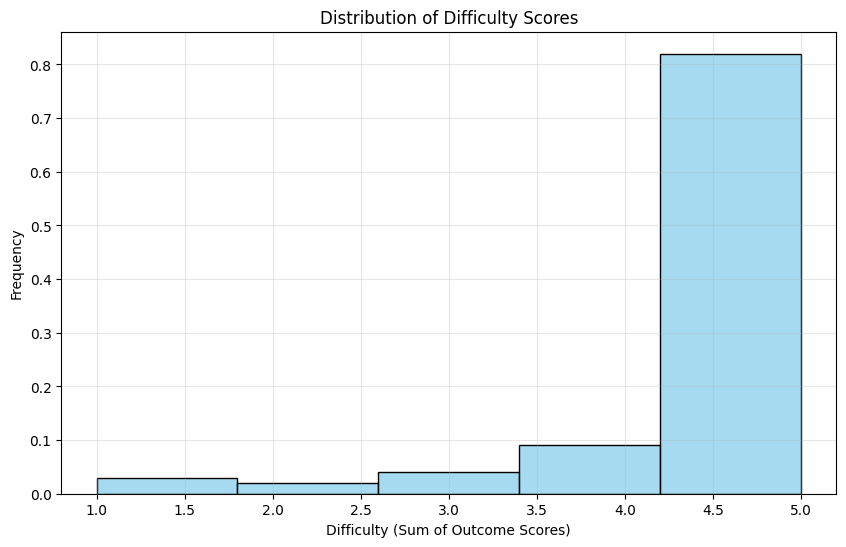

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['difficulty'], color='skyblue', stat="probability", bins=5)
plt.title('Distribution of Difficulty Scores')
plt.xlabel('Difficulty (Sum of Outcome Scores)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

In [52]:
# Now prepare the SFT dataset. For each row, we will create a new row with the following columns:
# - index
# - prompt
# - response (str)

# Use rejection sampling. Sample one of the correct responses. Each row right now has a "reward_score" column, which is a list of dicts. Each dict has a "extra_info", which is again a dict with a "outcome_score" key. We will sample one whose dicts with "outcome_score" == 1. We sample the decoded_response and the response.

# We create a new df to store our SFT dataset.

sft_df = list()

# Iterate all rows
for idx, row in df.iterrows():
    # Iterate all dicts in "reward_score"
    for i, d in enumerate(row["reward_score"]):
        # If "outcome_score" == 1
        if d["extra_info"]["outcome_score"] == 1:
            sft_df.append({
                "index": idx,
                "prompt": row["prompt"],
                "response": row["decoded_responses"][i],
                "reward_model": row["reward_model"],
                "difficulty": row["difficulty"]
            })
            break

sft_df = pd.DataFrame(sft_df)
            


In [53]:
print(len(sft_df))

100


In [54]:
display(sft_df.head())

,index,prompt,response,reward_model,difficulty
0,0,[{'content': 'You are a helpful assistant. The...,"<think> To solve this, let's analyze each stat...",{'ground_truth': {'solution_text_format': '(1)...,5
1,1,[{'content': 'You are a helpful assistant. The...,"<think> To solve this, let's analyze each stat...",{'ground_truth': {'solution_text_format': '(1)...,5
2,2,[{'content': 'You are a helpful assistant. The...,"<think> To solve this, let's analyze each stat...",{'ground_truth': {'solution_text_format': '(1)...,5
3,3,[{'content': 'You are a helpful assistant. The...,"<think> To solve this, let's analyze each stat...",{'ground_truth': {'solution_text_format': '(1)...,5
4,4,[{'content': 'You are a helpful assistant. The...,"<think> To solve this, let's analyze each stat...",{'ground_truth': {'solution_text_format': '(1)...,5


In [55]:
print(sft_df["index"])

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: index, Length: 100, dtype: int64


In [56]:
# Let's see what is the index of the question that doesn't have a correct answer
for idx in df.index:
    if idx not in sft_df["index"].values:
        print(idx)

In [58]:
# Let's look at that question
display(df.loc[2, "prompt"][1]["content"])
display(df.loc[2, "reward_model"]["ground_truth"]["solution_text_format"])
display(df.loc[2, "decoded_responses"][0])

'A very special island is inhabited only by knights and knaves. Knights always tell the truth, and knaves always lie. You meet 5 inhabitants: Aiden, William, Evelyn, Jackson, and Ava. "If William is a knave then Evelyn is a knight" - Aiden. William remarked, "Aiden is a knight and Ava is a knight". As Evelyn put it, "Ava is a knave and Aiden is a knave". Jackson commented, "Evelyn is not a knight". According to Ava, "William is a knave". So who is a knight and who is a knave?'

'(1) Aiden is a knave\n(2) William is a knave\n(3) Evelyn is a knave\n(4) Jackson is a knight\n(5) Ava is a knight'

'<think> To solve this, let\'s analyze each statement step by step, considering the implications based on whether the speakers are knights (who always tell the truth) or knaves (who always lie).\n\n1. Aiden says: "If William is a knave then Evelyn is a knight."\n2. William says: "Aiden is a knight and Ava is a knight."\n3. Evelyn says: "Ava is a knave and Aiden is a knave."\n4. Jackson says: "Evelyn is not a knight."\n5. Ava says: "William is a knave."\n\nLet\'s start by assuming William is a knight. If William is a knight, then his statement "Aiden is a knight and Ava is a knight" must be true. This means Aiden and Ava are both knights.\n\nIf Aiden is a knight, then his statement "If William is a knave then Evelyn is a knight" must be true. Since William is a knight, the condition "William is a knave" is false, making the whole statement true, which is consistent with Aiden being a knight.\n\nIf Ava is a knight, then her statement "William is a knave" must be true. However, we have al

In [59]:
#  Save the SFT dataset to parquet
sft_file_path = "../dataset_distilled_from_7b/kk/instruct/5ppl/sft.parquet"
# sft_file_path = "../dataset_distilled_from_7b/kk/instruct/5ppl/sft_val.parquet"
sft_df.to_parquet(sft_file_path, engine="pyarrow")